### Test script to evaluate whether PsiMethod.py works correctly. OBS() is a function that simulates the role of the observer, of which I define a TBW and PSS

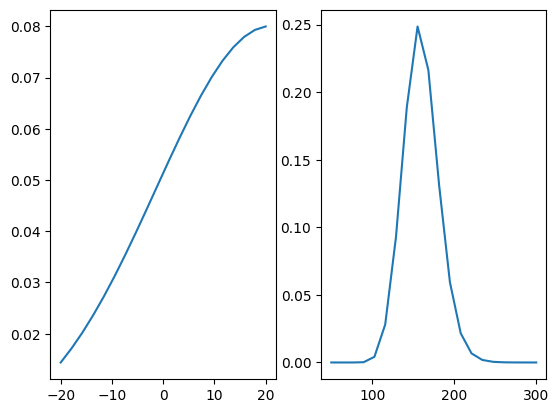

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PsiMethod
        
def GAUSSIAN(SOA,PSS,TBW):
    
    SD = (TBW-PSS)/np.log(4)
    
    g = np.exp(-((SOA-PSS)/SD)**2/2)
    
    return g

def OBS(SOA):
    
    TBW_true = 140 # ms
    PSS_true = 5 # ms
    
    a = GAUSSIAN(SOA,PSS_true,TBW_true)
    r = np.random.choice([0,1], p=[1-a,a])
    
    return r


SOA_min = -400
SOA_max = 400
PSS_min = -20
PSS_max = 20
TBW_min = 50
TBW_max = 300
nVal = 20
nComb = nVal**2 # Combinations (param vectors)
nSOA = 100

# Initialized
[lookup_table, prior, SOA_space, param_space] = PsiMethod.InitData(SOA_min, SOA_max, PSS_min, PSS_max, TBW_min, TBW_max, nVal, nSOA)

for i in range(30):

    [SOA_next, p_success] = PsiMethod.GetCurrentTrial(lookup_table, prior, nSOA, nVal)

    resp_data = OBS(SOA_space[SOA_next])

    prior_updated = PsiMethod.UpdatePrior(lookup_table, prior, p_success, resp_data, SOA_next)
    prior = prior_updated
    
PsiMethod.SaveResults(nVal, prior, param_space)